In [139]:
print("We have chosen “Netflix Movies and TV shows” as our dataset for data analysis")
print("This dataset contains 8807 rows and 11 columns of data - 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'")

We have chosen “Netflix Movies and TV shows” as our dataset for data analysis
This dataset contains 8807 rows and 11 columns of data - 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'


In [136]:
print("We can analyze some interesting questions -")
print("1. Which content is more uploaded Movie vs. Tv shows")
print("2. Year-wise comparison of the release of Movies and Tv shows.")
print("3. Which release month is best for the producer.")
print("4. Movie rating analysis based on country and year")
print("5. Analysis of the duration of the movie")
print("6. Top movies based on year, country, or rating")
print("7. Analysis of the director and cast")
print("8. Splitting listed_in category to find genres and do genre-wise analysis")
print("9. Top 10 counties with maximum content upload")
print("10. Recent release trends of movies and TV shows")


We can analyze some interesting questions -
1. Which content is more uploaded Movie vs. Tv shows
2. Year-wise comparison of the release of Movies and Tv shows.
3. Which release month is best for the producer.
4. Movie rating analysis based on country and year
5. Analysis of the duration of the movie
6. Top movies based on year, country, or rating
7. Analysis of the director and cast
8. Splitting listed_in category to find genres and do genre-wise analysis
9. Top 10 counties with maximum content upload
10. Recent release trends of movies and TV shows


In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### **Missing values and data handling**
**Laith**


 We can see some columns have missing values.Mainly cast and director are missing most values. And it is not possible to replace them with any median or mode values. So, we can replace the nan with "Unknown" for better result.

In [141]:
df['cast'].replace(np.nan, 'Unknown',inplace  = True)
df['director'].replace(np.nan, 'Unknown',inplace  = True)

For country we can replace the nan with most popular country for better results.

In [142]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

For rating and duration only 4 and 3 values are missing respectively.So we can safely drop these rows.

In [143]:
df.dropna(inplace=True)

We remove all the duplicates if there are.

In [144]:
df.drop_duplicates(inplace= True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### **Compare movies vs Tv show counts**
**Laith**


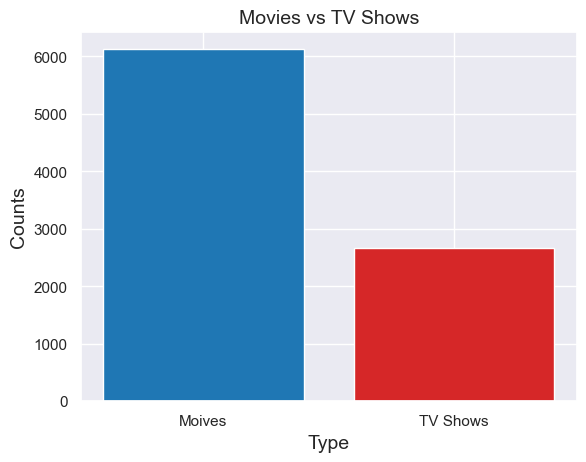

In [145]:
tv_count = df[df['type'] == 'TV Show']['type'].count()
movies_count = df[df['type'] == 'Movie']['type'].count()
plt.bar(['Moives', 'TV Shows'], [movies_count, tv_count], color=['tab:blue', 'tab:red'])
plt.title('Movies vs TV Shows', fontsize=14)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

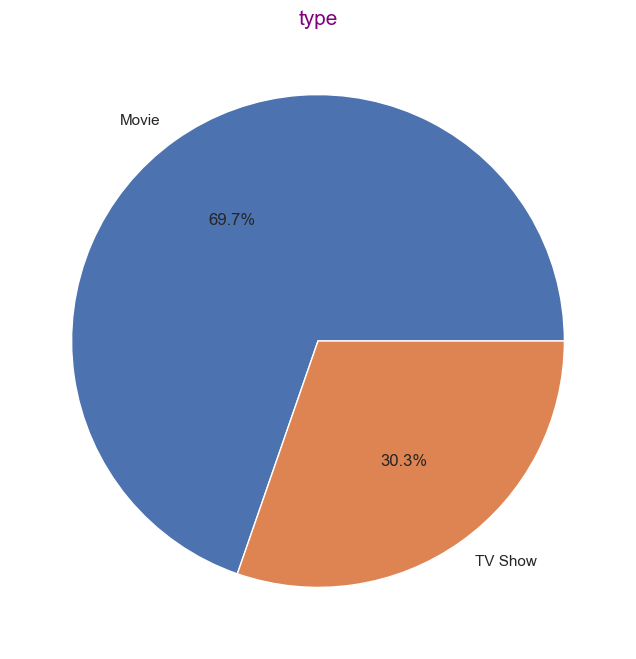

In [146]:
labels = df["type"].value_counts().index
sizes = df["type"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%')
plt.title('type', color='purple', fontsize=15)
plt.show()

**Analysis** We see that almost 70% of the contents in Netflix are of movies and 30% are from TV shows.

### **Year-wise comparison of the release of Movies and Tv shows.**
**Laith**

Release count of movies over the last 15 years


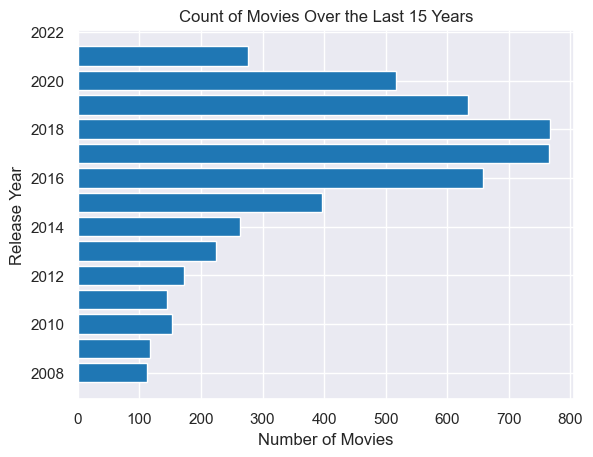

In [147]:
movies = df[df['type'] == 'Movie']
last_15_years = movies[movies['release_year'] >= 2008]
counts = last_15_years['release_year'].value_counts().sort_index(ascending=False)
plt.barh(counts.index, counts.values, color='tab:blue')
plt.xlabel('Number of Movies')
plt.ylabel('Release Year')
plt.title('Count of Movies Over the Last 15 Years')
plt.show()

Release count of Tv shows over the last 15 years

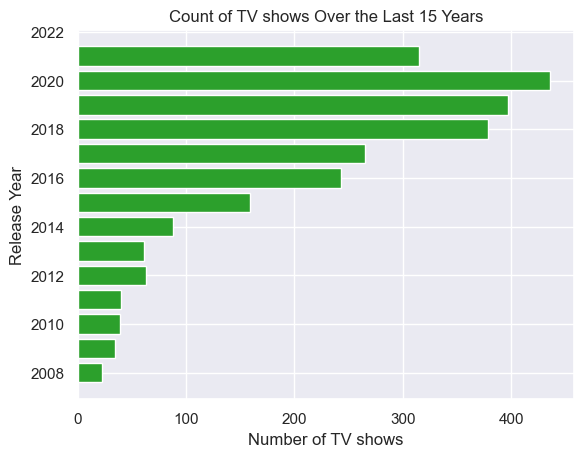

In [148]:
tv_shows = df[df['type'] == 'TV Show']
last_15_years = tv_shows[tv_shows['release_year'] >= 2008]
counts = last_15_years['release_year'].value_counts().sort_index(ascending=False)
plt.barh(counts.index, counts.values, color='tab:green')
plt.xlabel('Number of TV shows')
plt.ylabel('Release Year')
plt.title('Count of TV shows Over the Last 15 Years')
plt.show()

#### **Analysis**
We see a gradual increase in movies and Tv shows over the year except for 2021. 2021 is an exception as due to covid lockdown movie industry could not work as effieciently.

### **Which month is least used by the producer to release their content?**
**Laith**

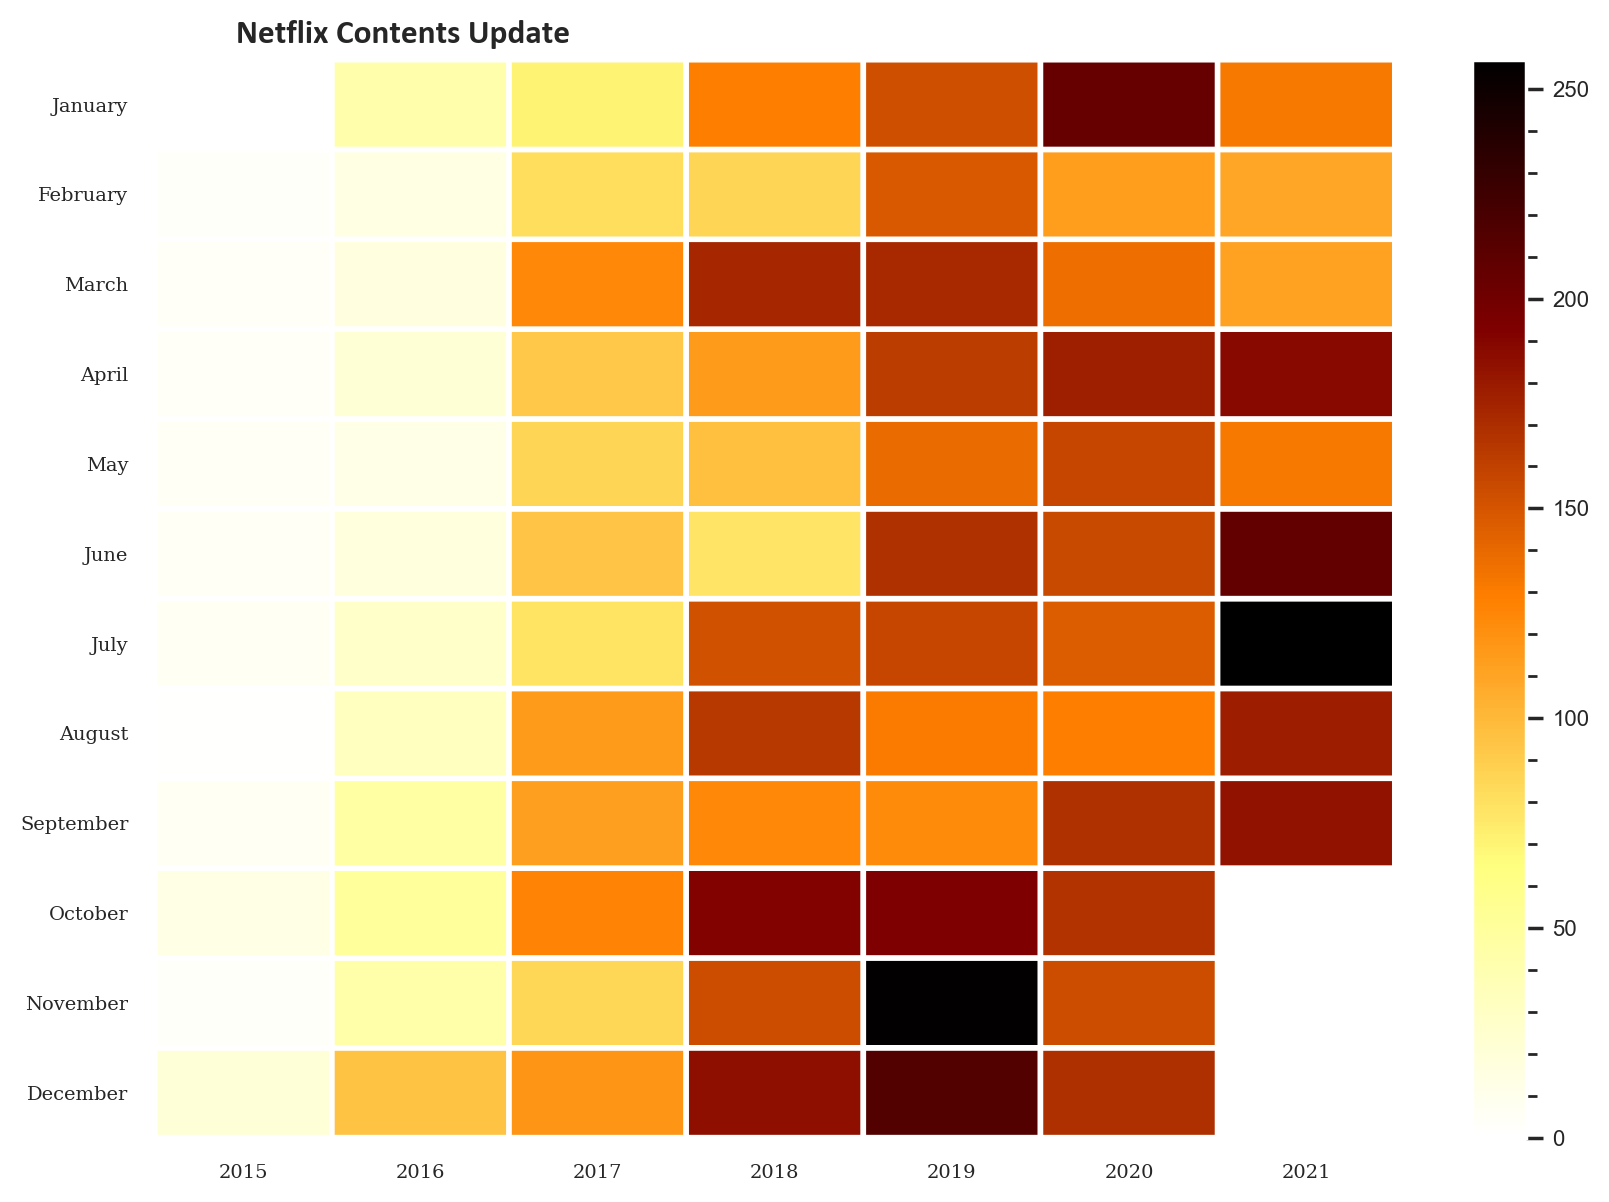

In [149]:
netflix_date = df[['date_added']].copy()
netflix_date['year'] = netflix_date['date_added'].apply(
    lambda x: x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(
    lambda x: x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December'][::-1]
data = netflix_date[netflix_date['year'].astype(int) > 2014].groupby(
    'year')['month'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(data, cmap='afmhot_r', edgecolors='white', linewidths=2)  
plt.xticks(np.arange(0.5, len(data.columns), 1),
           data.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(data.index), 1),
           data.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri',
          fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

**Analysis:**
From the heatmap we can see that in recent years, the later half of the year(June to December) are where most of the contents are released. So a director can target February or March where least of the content are released foe better reach.

### **Movie rating count analysis**
**Khalifa**

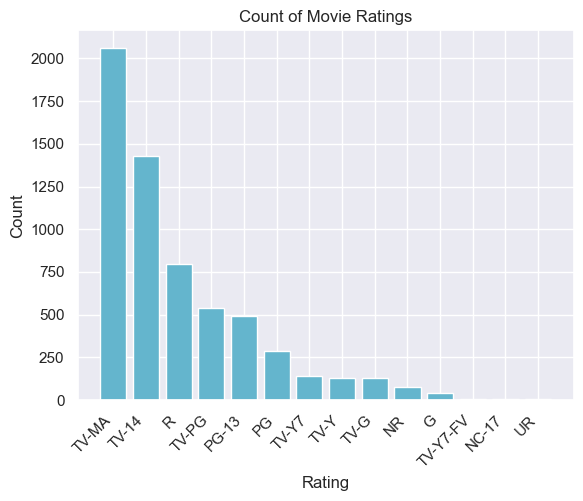

In [151]:
ratings = movies['rating'].value_counts().sort_values(ascending=False)[:15]
plt.bar(ratings.index, ratings.values, color='c')
plt.xticks(ratings.index, rotation=45, ha='right')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Movie Ratings')
plt.show()

**Analysis:**

'TV-MA' movies account for the largest count of movies made, as "TV-MA" ratings are assigned by TV Parental Guidelines towards a TV Program that has been designed with mature audiences in mind.

'TV-14' is the second largest, which also stands for content that may be unsuitable for children below the age of 14.

'R' Rating is the third largest, and it is correlated with films that have scenes or materials that are unsuitable for children or anyone under the age of 17 to watch, as stated by the Motion Pictures Association of America: "Under 17 requires accompanying parent or adult guardian".



### **Analysis of the duration of the movie**
**Khalifa**


We want to find out what is the average duration for movies, since the duration is in string format e.g "90 min", we have to convert it to numerical value, then we will get the median to compare the frequency of the movie durations.

In [153]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration'] = movies['duration'].str.replace(' min', '')
movies['duration'] = movies['duration'].astype(str).astype(int)
movies['duration']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6126, dtype: int32

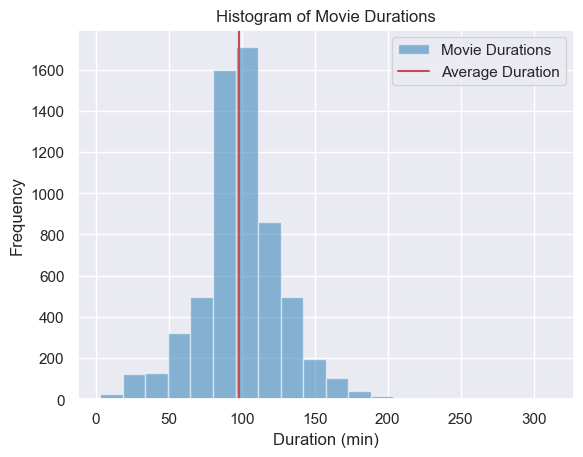

In [154]:
average_duration_m = movies['duration'].median()
plt.hist(movies['duration'], bins=20, color='tab:blue', alpha=0.5, label='Movie Durations')
plt.axvline(x=average_duration_m, color='r', linestyle='-', label='Average Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.title('Histogram of Movie Durations')
plt.legend()
plt.show()

**Analysis:** From the graph we can see that movies around 90 to 100 min duration are more common.

### **Top countries for movies**
**Khalifa**

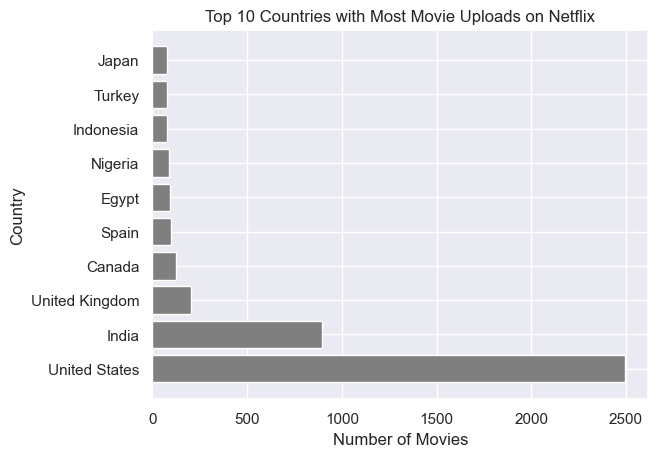

In [155]:
top_10_countries = movies['country'].value_counts().head(10)
plt.barh(top_10_countries.index, top_10_countries.values, color='tab:grey')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.title('Top 10 Countries with Most Movie Uploads on Netflix')
plt.show()

### **Top countries for TV shows**
**Khalifa**

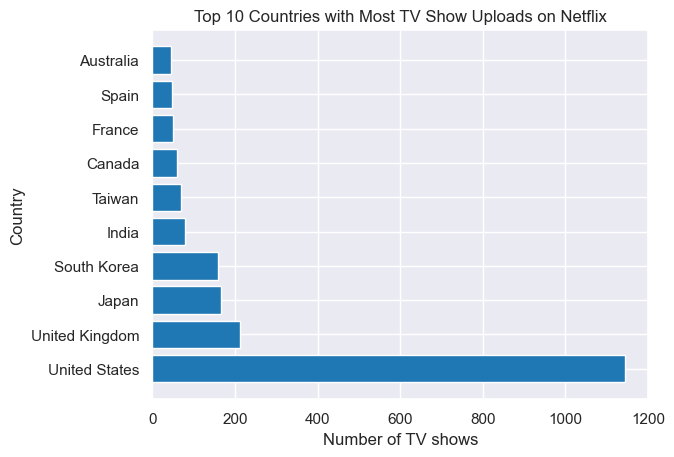

In [156]:
top_10_countries = tv_shows['country'].value_counts().head(10)
plt.barh(top_10_countries.index, top_10_countries.values, color='tab:blue')
plt.xlabel('Number of TV shows')
plt.ylabel('Country')
plt.title('Top 10 Countries with Most TV Show Uploads on Netflix')
plt.show()

**Analysis:** In both movies and TV shows, United States is the most content uploader with a huge lead. Wheras United Kingdom comes second in Tv shows and third in movies. It shows the domination of English content in netflix. India is also quite prominent in movie uploads. 

### **Analysis of the director and cast**
**Khalifa**


Top 20 directors with most number of contents.

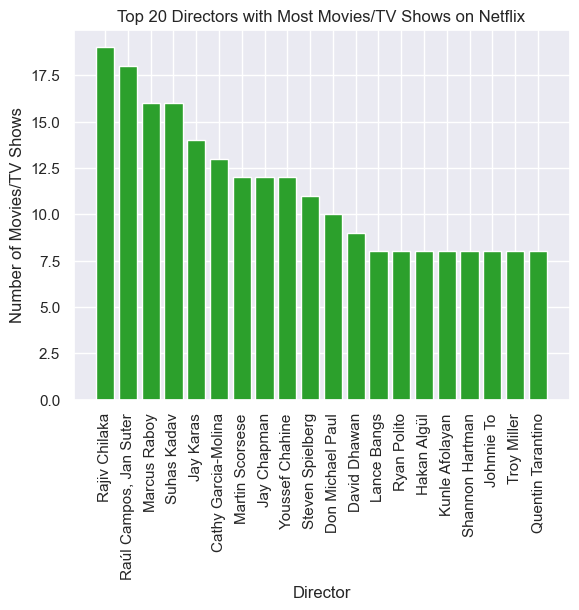

In [157]:
data = df[df['director'] != 'Unknown']
top_20_directors = data['director'].value_counts().head(20)
plt.bar(top_20_directors.index, top_20_directors.values, color='tab:green')
plt.xticks(rotation=90)
plt.xlabel('Director')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Top 20 Directors with Most Movies/TV Shows on Netflix')
plt.show()

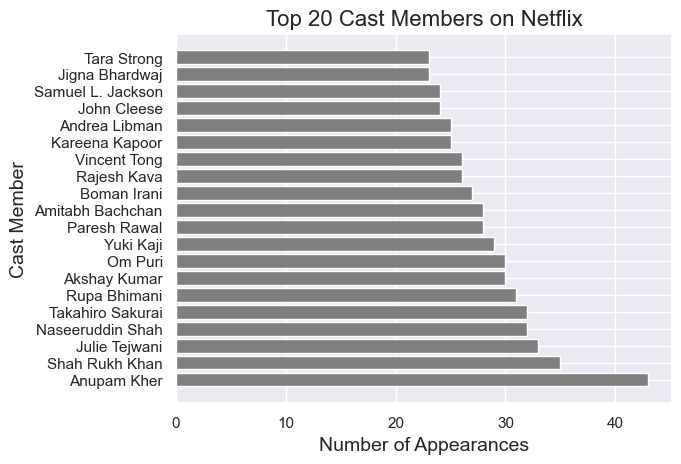

In [158]:
df_cast = df.assign(cast=df['cast'].str.split(', ')).explode('cast')
df_cast = df_cast[df_cast['cast'] != 'Unknown']
top_cast = df_cast['cast'].value_counts().sort_values(ascending=False)[:20]
plt.barh(top_cast.index, top_cast.values, color='tab:grey')
plt.title('Top 20 Cast Members on Netflix', fontsize=16)
plt.xlabel('Number of Appearances', fontsize=14)
plt.ylabel('Cast Member', fontsize=14)
plt.show()

### **Genre vs their counts in Netflix**
**Khalifa**

As there can be multiple genre for a single movie or TV show, we need to split them from the 'listed_in' column

In [159]:
genres_d = df.copy()
genres_d = genres_d.assign(genres=genres_d['listed_in'].str.split(', ')).explode('genres')
genres_d.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Dramas
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows


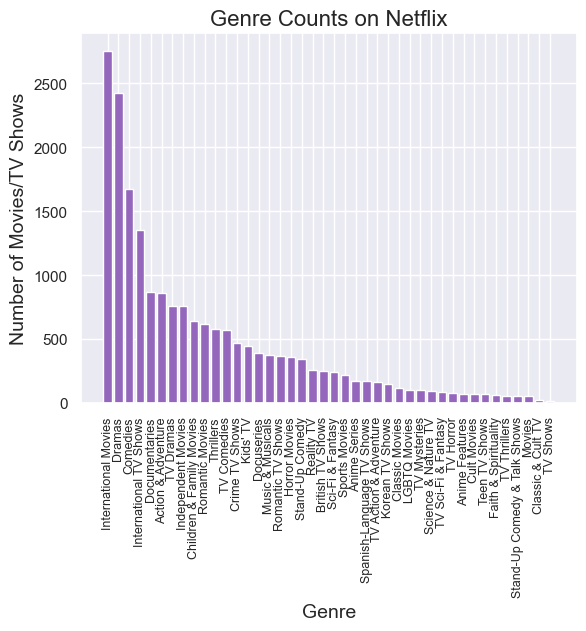

In [160]:
genre_counts = genres_d['genres'].value_counts()
plt.bar(genre_counts.index, genre_counts.values, width=0.8, color='tab:purple')
plt.title('Genre Counts on Netflix', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.xticks(rotation=90, fontsize=9)
plt.ylabel('Number of Movies/TV Shows', fontsize=14)
plt.show()

**Analysis:** So, International_Movies is the most popular genre in Netflix follwed by dramas, comedies etc.

### **Recent release trends of movies and TV shows**
**Laith**

We plot the recent yearly uploads for movies vs TV shows. We excluded 2021 as there was covid situation and it can be considered as an outlier.

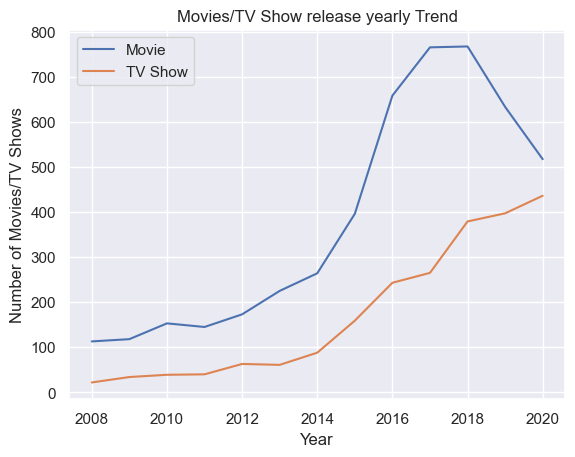

In [161]:
df_2008 = df[df['release_year'] >= 2008]
df_2020 = df_2008[df_2008['release_year'] < 2021]
df_2020 = df_2020.groupby(['type', 'release_year'])['show_id'].count().reset_index()
for t in ['Movie', 'TV Show']:
    data = df_2020[df_2020['type'] == t]
    plt.plot(data['release_year'], data['show_id'], label=t)
plt.title('Movies/TV Show release yearly Trend')
plt.xlabel('Year')
plt.ylabel('Number of Movies/TV Shows')
plt.legend()
plt.show()

**Analysis:** Here  we see and interesting curve where although the number of movie release is more than the TV show release, in recent years Netflix is decresing the movie uploads. Whereas we can see a gradual increase in the popularity of TV shows. It may be due to the season based content in Tv shows as oppsed to an hour or two content in movies. People are enjoying the Tv shows more.